<a href="https://colab.research.google.com/github/govardhanraju0950/Optimizing-BlackFridaySalesForecasts-/blob/main/DogAndCaImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip


--2024-09-10 16:06:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.207, 64.233.187.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  17.6MB/s    in 4.3s    

2024-09-10 16:06:50 (15.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-09-10 16:08:26--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.207, 64.233.187.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  20.5MB/s    in 4.9s    

2024-09-10 16:08:31 (17.3 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [6]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [7]:
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)

In [8]:
pre_trained_model.load_weights(local_weights_file)

In [9]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [10]:
# Freeze the Layers
for layer in pre_trained_model.layers:
  layer.trainable = False

In [13]:
# Retrieve the last layer
last_layer = pre_trained_model.get_layer(name='mixed7')
# print('Last Layer Output Shape: ', last_layer.output_shape)

In [17]:
# Output of the last layer
last_output = last_layer.output

x = layers.Flatten()(last_output)

x = layers.Dense(units=1024, activation='relu')(x)

x = layers.Dropout(rate=0.2)(x)

x = layers.Dense(units=1, activation='sigmoid')(x)

In [18]:
model = Model(pre_trained_model.input, x)

In [19]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

In [21]:
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

test_generator = test_datagen.flow_from_directory(directory=validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=20,  verbose=1)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - acc: 0.7890 - loss: 0.6005
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - acc: 0.9198 - loss: 0.1908
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - acc: 0.9461 - loss: 0.1401
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - acc: 0.9197 - loss: 0.1748
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - acc: 0.9519 - loss: 0.1399
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - acc: 0.9367 - loss: 0.1737
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - acc: 0.9506 - loss: 0.1452
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 

In [29]:
class_names = ['Cat', 'Dog']

Saving cat.jpg to cat.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


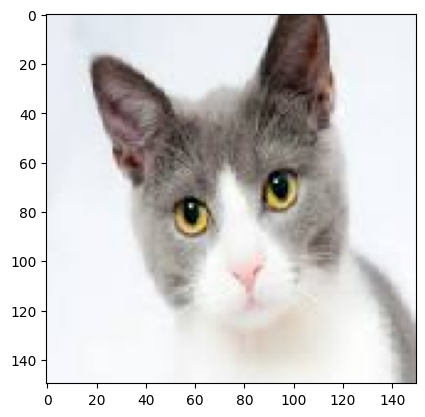

Prediction: Cat


In [32]:
uploaded = files.upload()

for file_name in uploaded.keys():

  path = file_name

  img = image.load_img(path, target_size=(150, 150))

  x = image.img_to_array(img)

  x = np.expand_dims(x, axis=0)

  x /= 255.

  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  plt.imshow(img)
  plt.grid(False)
  plt.show()

  if classes[0][0] > 0.6:
    print('Prediction: {}'.format(class_names[1]))
  else:
    print('Prediction: {}'.format(class_names[0]))